In [37]:
import pandas as pd

# Daten einlesen
# Destatis_Schutzsuchende_12531-0023 
# ACHTUNG: Ländergruppierungen_Label 'insgesamt' sind die korrekten Werte. Die Ländergruppierungen überschneiden sich.
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Schutzsuchende_12531-0023_aufbereitet.csv"
df = pd.read_csv(url)

df.head()

Stichtag  Bundesland_Code           Bundesland       Alter  \
0  2023-12-31                3        Niedersachsen  65-Jährige   
1  2023-12-31                5  Nordrhein-Westfalen  43-Jährige   
2  2023-12-31               11               Berlin  11-Jährige   
3  2023-12-31                5  Nordrhein-Westfalen  68-Jährige   
4  2023-12-31               10             Saarland  12-Jährige   

  Ländergruppierungen_Code                Ländergruppierungen_Label  \
0              LDR-GASTARB                       Gastarbeiterländer   
1              DRITT-EU-28   Drittstaaten zu EU-28 (bis 31.01.2020)   
2              LDR-GASTARB                       Gastarbeiterländer   
3              DRITT-EU-27   Drittstaaten zu EU-27 (bis 30.06.2013)   
4            DRITT-EU-27-1  Drittstaaten zu EU-27 (seit 01.02.2020)   

                     Migrantengeneration Geschlecht  Anzahl  Schutzsuchende  
0      1. Generation (Geburt im Ausland)   männlich     110  Schutzsuchende  
1  2. Generation (Geburt in Deutschland)   weiblich      10  Schutzsuchende  
2      1. Generation (Geburt im Ausland)   männlich      80  Schutzsuchende  
3  2. Generation (Geburt in Deutschland)   männlich      10  Schutzsuchende  
4      1. Generation (Geburt im Ausland)   männlich     485  Schutzsuchende

In [38]:
# Erstellen der neuen Spalte 'Migrantengeneration_Code'
df['Migrantengeneration_Code'] = df['Migrantengeneration'].map({
    "2. Generation (Geburt in Deutschland)": 2,
    "1. Generation (Geburt im Ausland)": 1
})

In [39]:
schutzsuchende_gesamt = df[df["Ländergruppierungen_Label"] == "Insgesamt"]

schutzsuchende_gesamt.head()

Stichtag  Bundesland_Code           Bundesland       Alter  \
6    2023-12-31               10             Saarland   1-Jährige   
33   2023-12-31               12          Brandenburg  30-Jährige   
81   2023-12-31                5  Nordrhein-Westfalen   1-Jährige   
105  2023-12-31                8    Baden-Württemberg  56-Jährige   
118  2023-12-31               15       Sachsen-Anhalt  85-Jährige   

    Ländergruppierungen_Code Ländergruppierungen_Label  \
6                        NaN                 Insgesamt   
33                       NaN                 Insgesamt   
81                       NaN                 Insgesamt   
105                      NaN                 Insgesamt   
118                      NaN                 Insgesamt   

                       Migrantengeneration Geschlecht  Anzahl  Schutzsuchende  \
6    2. Generation (Geburt in Deutschland)   männlich     215  Schutzsuchende   
33   2. Generation (Geburt in Deutschland)   männlich       5  Schutzsuchende   
81   2. Generation (Geburt in Deutschland)   männlich    3245  Schutzsuchende   
105      1. Generation (Geburt im Ausland)   weiblich    1440  Schutzsuchende   
118      1. Generation (Geburt im Ausland)   weiblich      45  Schutzsuchende   

     Migrantengeneration_Code  
6                           2  
33                          2  
81                          2  
105                         1  
118                         1

<Figure size 1000x600 with 0 Axes>

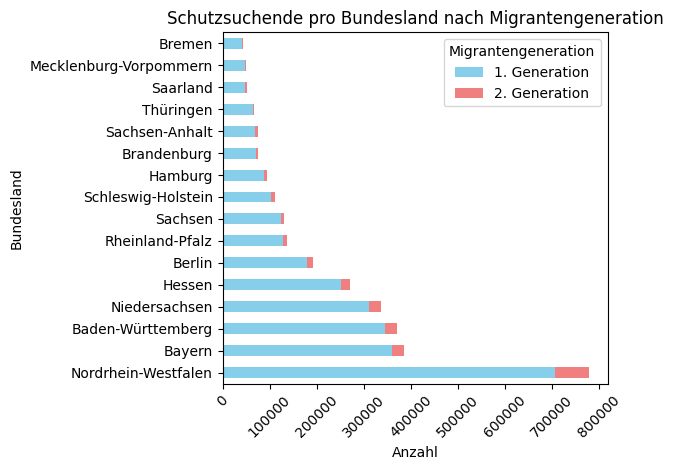

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Gruppieren nach Bundesland und migrantengeneration_code, dann aufsummieren
bundesland_migration = schutzsuchende_gesamt.groupby(["Bundesland", "Migrantengeneration_Code"])["Anzahl"].sum().unstack(fill_value=0)

# Gesamtsumme pro Bundesland berechnen und nach dieser sortieren
bundesland_migration["Gesamtsumme"] = bundesland_migration.sum(axis=1)
bundesland_migration = bundesland_migration.sort_values(by="Gesamtsumme", ascending=False)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Gestapeltes Balkendiagramm erstellen
ax = bundesland_migration.drop("Gesamtsumme", axis=1).plot(kind="barh", stacked=True, color=["skyblue", "lightcoral"])

# Achsentitel anpassen
plt.title("Schutzsuchende pro Bundesland nach Migrantengeneration")
plt.xlabel("Anzahl")
#plt.ylabel("Bundesland")

# Anpassung der Legende
plt.legend(title="Migrantengeneration", labels=["1. Generation", "2. Generation"])

# Beschriftungen rotieren
plt.xticks(rotation=45)  # X-Achsen-Beschriftungen um 45 Grad rotieren
plt.yticks(rotation=0)   # Y-Achsen-Beschriftungen (falls nötig, auf 0 Grad setzen)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [ ]:
# Schutzsuchende nach Ländergruppen
